<a href="https://colab.research.google.com/github/muhammadabdulbaqi/customer_churn/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install any missing libraries
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/churndata.csv'

In [ ]:
# Load the dataset
df = pd.read_csv(file_path)
# Display the first few rows to confirm it loaded correctly
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' to handle non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now re-run df.describe() to include 'TotalCharges'
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Example for 'Churn' and 'InternetService'
print(df['Churn'].value_counts())
print(df['InternetService'].value_counts())


Churn
No     5174
Yes    1869
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [ ]:
# Total count of missing values per column
missing_data = df.isnull().sum()
print("Missing values:\n", missing_data[missing_data > 0])


Missing values:
 TotalCharges    11
dtype: int64


In [ ]:
unique_counts = df.nunique()
print("Unique values per column:\n", unique_counts)


Unique values per column:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [ ]:
# View unique values for 'MultipleLines' and 'OnlineSecurity'
print(df['MultipleLines'].unique())
print(df['OnlineSecurity'].unique())


['No phone service' 'No' 'Yes']
['No' 'Yes' 'No internet service']


In [ ]:
# Impute missing TotalCharges with median or mean
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


<ipython-input-13-a780f81c7e03>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
# Convert binary columns to 0 and 1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['PaperlessBilling']

,PaperlessBilling
0,1
1,0
2,1
3,0
4,1
...,...
7038,1
7039,1
7040,1
7041,1


In [ ]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,No,Yes,...,29.85,29.85,0,False,False,False,False,False,True,False
1,5575-GNVDE,Male,0,0,0,34,1,No,Yes,No,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,3668-QPYBK,Male,0,0,0,2,1,No,Yes,Yes,...,53.85,108.15,1,False,False,False,False,False,False,True
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,Yes,No,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,9237-HQITU,Female,0,0,0,2,1,No,No,No,...,70.70,151.65,1,True,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale selected columns
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [ ]:
df['tenure'].describe()

,tenure
count,7.043000e+03
mean,-2.421273e-17
std,1.000071e+00
min,-1.318165e+00
25%,-9.516817e-01
50%,-1.372744e-01
75%,9.214551e-01
max,1.613701e+00


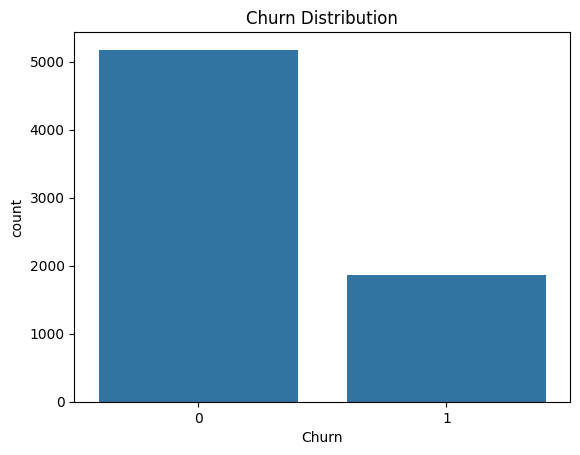

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


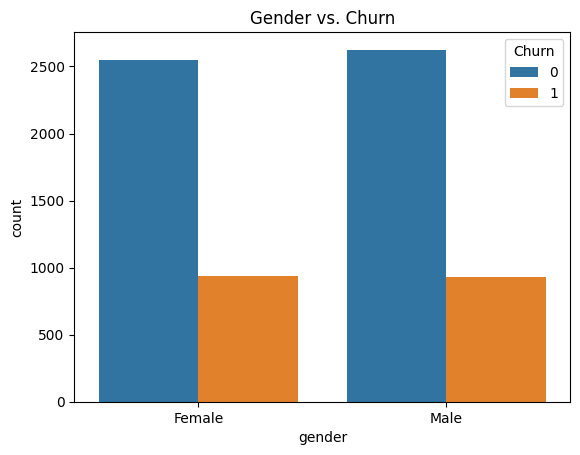

In [ ]:
# Gender vs. Churn
sns.countplot(data=df, x='gender', hue='Churn')
plt.title("Gender vs. Churn")
plt.show()


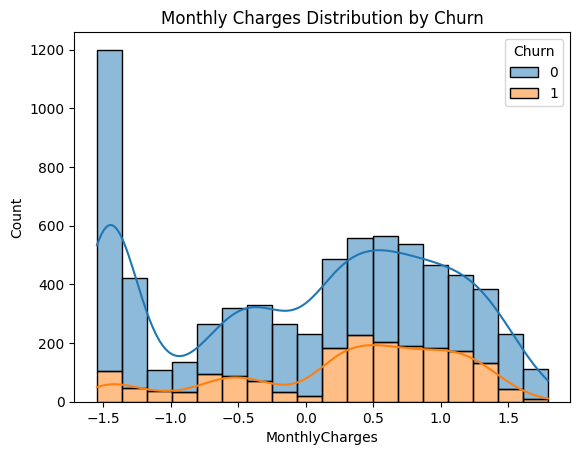

In [ ]:
# MonthlyCharges vs. Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple="stack", kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

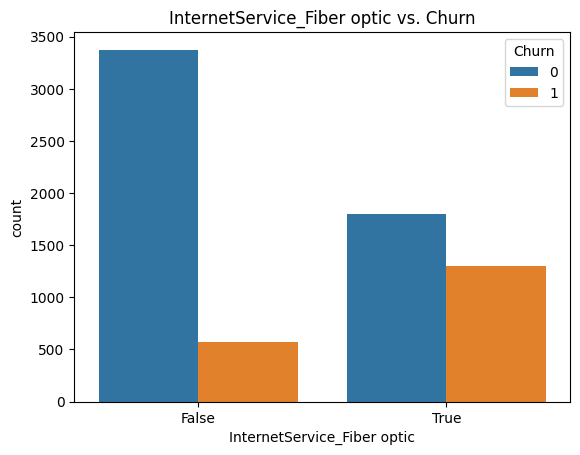

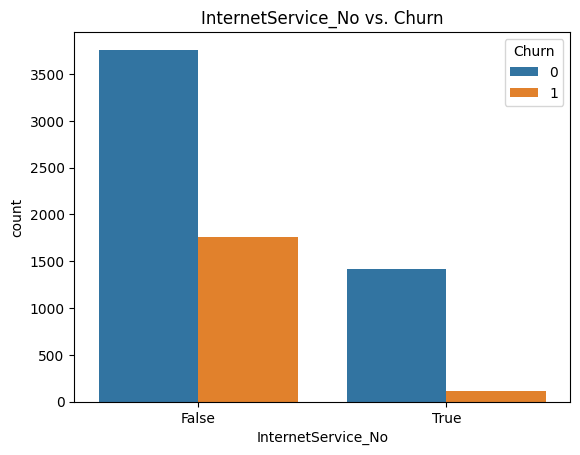

In [ ]:
# Plotting each type of InternetService against Churn
internet_service_cols = ['InternetService_Fiber optic', 'InternetService_No']

for col in internet_service_cols:
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs. Churn")
    plt.show()


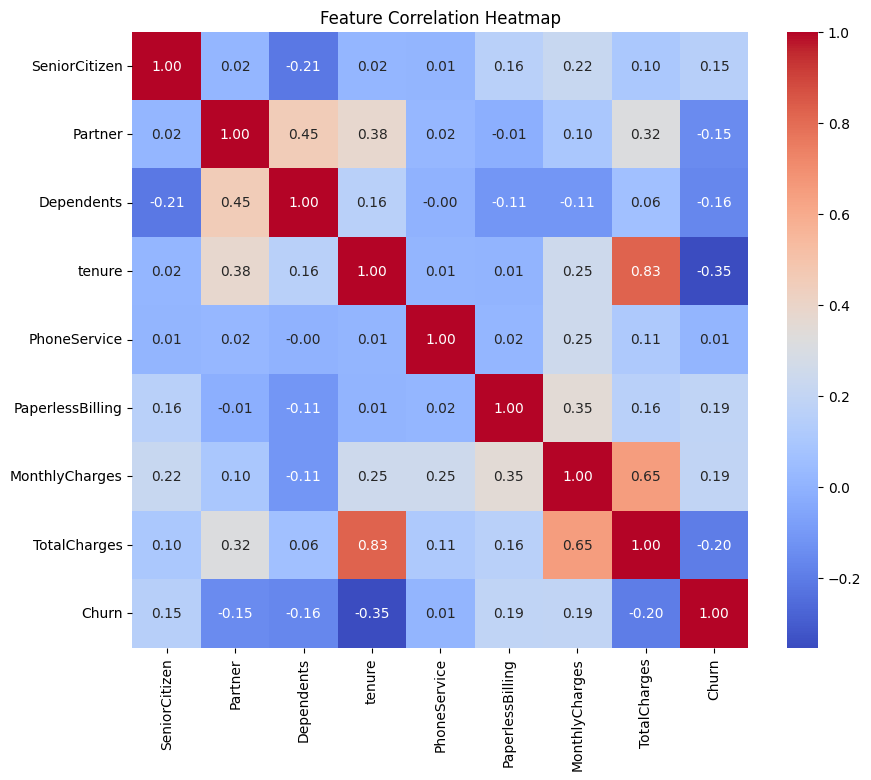

In [ ]:
# Selecting only numeric columns for the correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


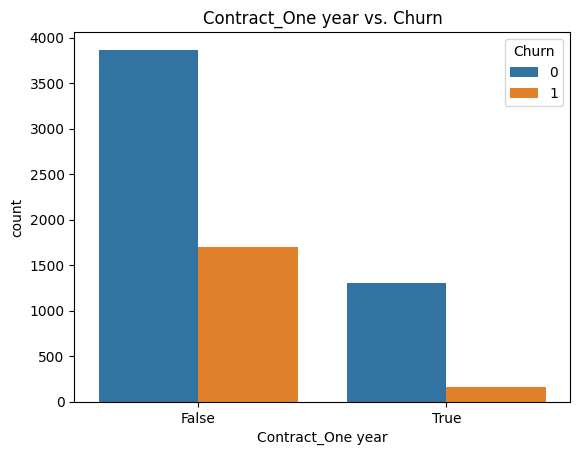

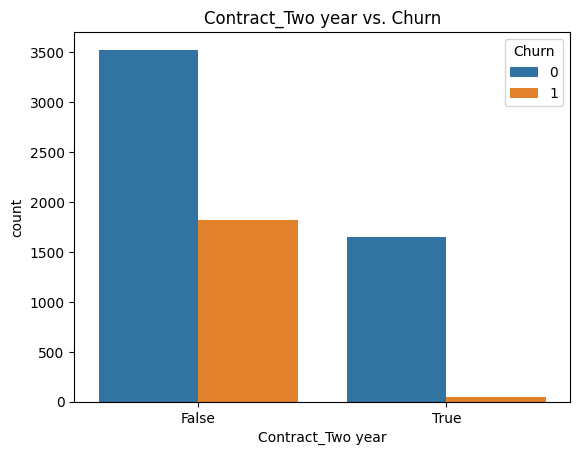

In [ ]:
# List of contract-related columns
contract_cols = ['Contract_One year', 'Contract_Two year']

for col in contract_cols:
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs. Churn")
    plt.show()


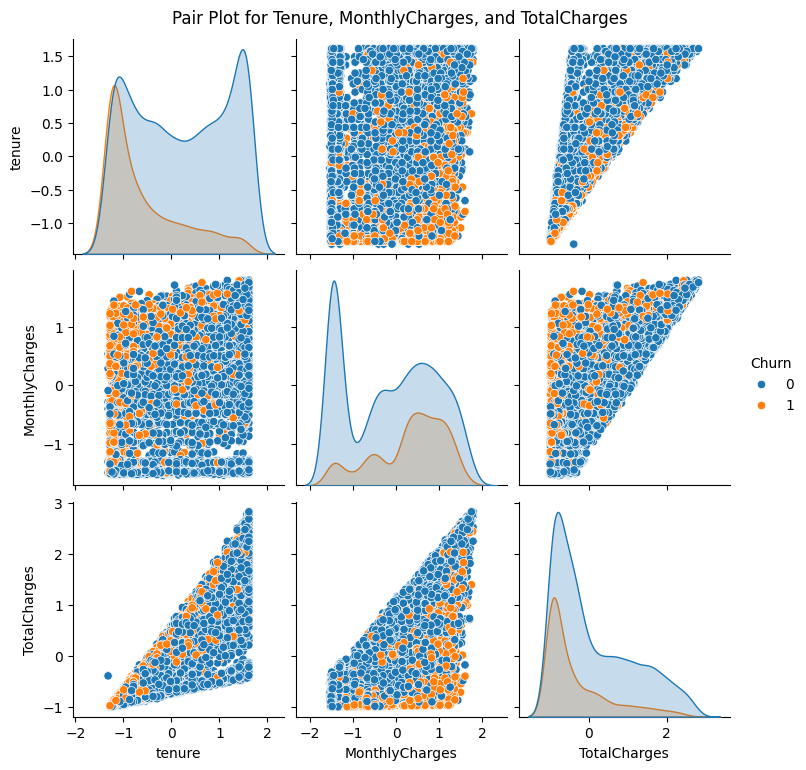

In [ ]:
# Pair plot for tenure, MonthlyCharges, and TotalCharges
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')
plt.suptitle("Pair Plot for Tenure, MonthlyCharges, and TotalCharges", y=1.02)
plt.show()


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,-1.277445,0,No phone service,No,Yes,...,-1.160323,-0.994242,0,False,False,False,False,False,True,False
1,5575-GNVDE,Male,0,0,0,0.066327,1,No,Yes,No,...,-0.259629,-0.173244,0,False,False,True,False,False,False,True
2,3668-QPYBK,Male,0,0,0,-1.236724,1,No,Yes,Yes,...,-0.362660,-0.959674,1,False,False,False,False,False,False,True
3,7795-CFOCW,Male,0,0,0,0.514251,0,No phone service,Yes,No,...,-0.746535,-0.194766,0,False,False,True,False,False,False,False
4,9237-HQITU,Female,0,0,0,-1.236724,1,No,No,No,...,0.197365,-0.940470,1,True,False,False,False,False,True,False


In [ ]:
# 1. Churn Rate by Contract Type (encoded columns)
print("Churn Rate by Contract Type:")
contract_churn = df.groupby(['Contract_One year', 'Contract_Two year'])['Churn'].value_counts(normalize=True).unstack()
print(contract_churn)

# 2. Churn Rate by Internet Service Type (encoded columns)
print("\nChurn Rate by Internet Service Type:")
internet_churn = df.groupby(['InternetService_Fiber optic', 'InternetService_No'])['Churn'].value_counts(normalize=True).unstack()
print(internet_churn)

# 3. Tenure Analysis for Churned vs. Non-Churned Customers
print("\nAverage Tenure for Churned and Non-Churned Customers:")
tenure_churn = df.groupby('Churn')['tenure'].describe()
print(tenure_churn)

# 4. Monthly Charges for Churned vs. Non-Churned Customers
print("\nAverage Monthly Charges for Churned and Non-Churned Customers:")
monthly_charges_churn = df.groupby('Churn')['MonthlyCharges'].describe()
print(monthly_charges_churn)

# 5. Total Charges Summary (already standardized in your data)
print("\nAverage Total Charges for Churned and Non-Churned Customers:")
total_charges_churn = df.groupby('Churn')['TotalCharges'].describe()
print(total_charges_churn)

# 6. Churn Rate by Payment Method (encoded columns)
print("\nChurn Rate by Payment Method:")
payment_churn = df.groupby(['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])['Churn'].value_counts(normalize=True).unstack()
print(payment_churn)

# 7. Impact of Additional Services (e.g., TechSupport, MultipleLines) on Churn
print("\nChurn Rate by TechSupport:")
techsupport_churn = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()
print(techsupport_churn)

print("\nChurn Rate by MultipleLines:")
multilines_churn = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack()
print(multilines_churn)


Churn Rate by Contract Type:
Churn                                       0         1
Contract_One year Contract_Two year                    
False             False              0.572903  0.427097
                  True               0.971681  0.028319
True              False              0.887305  0.112695

Churn Rate by Internet Service Type:
Churn                                                  0         1
InternetService_Fiber optic InternetService_No                    
False                       False               0.810409  0.189591
                            True                0.925950  0.074050
True                        False               0.581072  0.418928

Average Tenure for Churned and Non-Churned Customers:
        count      mean       std       min       25%       50%       75%  \
Churn                                                                       
0      5174.0  0.211698  0.981922 -1.318165 -0.707359  0.229209  1.165777   
1      1869.0 -0.586048  0.79531

In [ ]:
# Fill missing values in TotalCharges with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df['TotalCharges'].isna().sum()

0

In [ ]:
# Drop customerID column
df.drop(columns=['customerID'], inplace=True)


In [ ]:
# Encoding binary features
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})


In [ ]:
# Convert 'No' to 0 and 'Yes' to 1 in service columns
service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_columns:
    df[col] = df[col].replace({'No': 0, 'Yes': 1, 'No internet service': 0, 'No phone service': 0})

# Check for any remaining missing values and display the first few rows
print("Missing values after preprocessing:\n", df.isnull().sum())
df.head()

Missing values after preprocessing:
 gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Ele

<ipython-input-41-b1f5e88a56f1>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'No': 0, 'Yes': 1, 'No internet service': 0, 'No phone service': 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,0,0,1,0,...,-1.160323,-0.994242,0,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,1,0,1,...,-0.259629,-0.173244,0,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,0,1,1,0,...,-0.362660,-0.959674,1,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,1,0,1,...,-0.746535,-0.194766,0,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,0,0,0,0,...,0.197365,-0.940470,1,True,False,False,False,False,True,False


In [ ]:
# Convert True/False values to binary (1 and 0)
binary_columns = ['InternetService_Fiber optic', 'InternetService_No', 'Contract_One year',
                  'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
                  'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

df[binary_columns] = df[binary_columns].astype(int)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,0,0,1,0,...,-1.160323,-0.994242,0,0,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,1,0,1,...,-0.259629,-0.173244,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.236724,1,0,1,1,0,...,-0.362660,-0.959674,1,0,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,1,0,1,...,-0.746535,-0.194766,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.236724,1,0,0,0,0,...,0.197365,-0.940470,1,1,0,0,0,0,1,0


In [ ]:
# 1. Create LongTermContract feature
df['LongTermContract'] = (df['Contract_One year'] | df['Contract_Two year']).astype(int)

# 2. Create FiberOpticService feature
df['FiberOpticService'] = df['InternetService_Fiber optic'].astype(int)

# 3. Bin Tenure into categories (e.g., New: 0-12 months, Intermediate: 12-36 months, Long-term: >36 months)
# Adjust these bins as necessary based on your data distribution
df['TenureCategory'] = pd.cut(df['tenure'], bins=[-float('inf'), 0, 12, 36, float('inf')],
                              labels=['Unknown', 'New', 'Intermediate', 'Long-term'])

# 4. Create HighMonthlyCharges feature (binary for simplicity)
high_charge_threshold = df['MonthlyCharges'].quantile(0.75)  # or define your own threshold
df['HighMonthlyCharges'] = (df['MonthlyCharges'] > high_charge_threshold).astype(int)

# 5. MonthlyCharges/TotalCharges Ratio (to account for high charges over shorter tenures)
df['ChargesRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1e-5)  # Add small epsilon to avoid division by zero

# 6. UsesElectronicCheck feature
df['UsesElectronicCheck'] = df['PaymentMethod_Electronic check'].astype(int)

# Display the first few rows to check the new features
df[['LongTermContract', 'FiberOpticService', 'TenureCategory', 'HighMonthlyCharges', 'ChargesRatio', 'UsesElectronicCheck']].head()


,LongTermContract,FiberOpticService,TenureCategory,HighMonthlyCharges,ChargesRatio,UsesElectronicCheck
0,0,0,New,0,1.167055,1
1,1,0,New,0,1.498717,0
2,0,0,New,0,0.377903,0
3,1,0,New,0,3.833178,0
4,0,1,New,0,-0.209860,1


In [ ]:
df.drop(columns=['TenureCategory'], inplace=True)


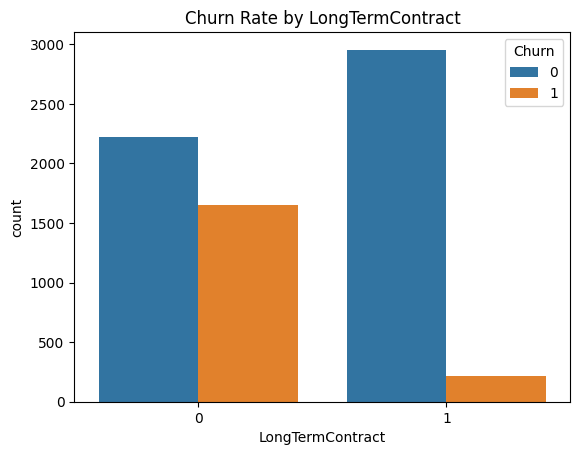

In [ ]:
sns.countplot(data=df, x='LongTermContract', hue='Churn')
plt.title("Churn Rate by LongTermContract")
plt.show()


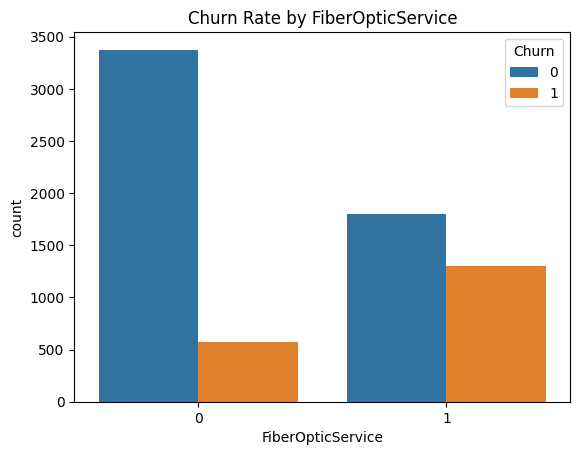

In [ ]:
sns.countplot(data=df, x='FiberOpticService', hue='Churn')
plt.title("Churn Rate by FiberOpticService")
plt.show()


In [ ]:
# sns.countplot(data=df, x='TenureCategory', hue='Churn')
# plt.title("Churn Rate by Tenure Category")
# plt.show()


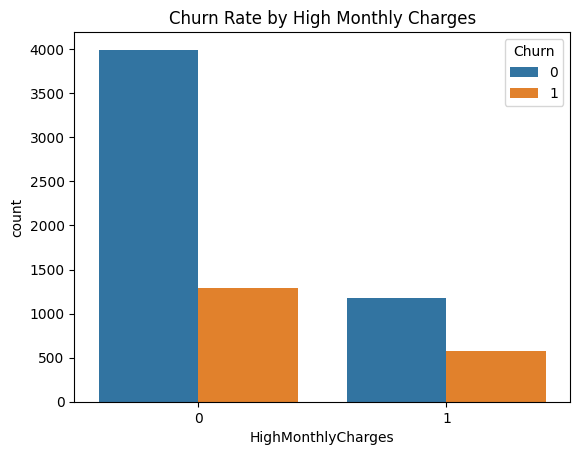

In [ ]:
sns.countplot(data=df, x='HighMonthlyCharges', hue='Churn')
plt.title("Churn Rate by High Monthly Charges")
plt.show()


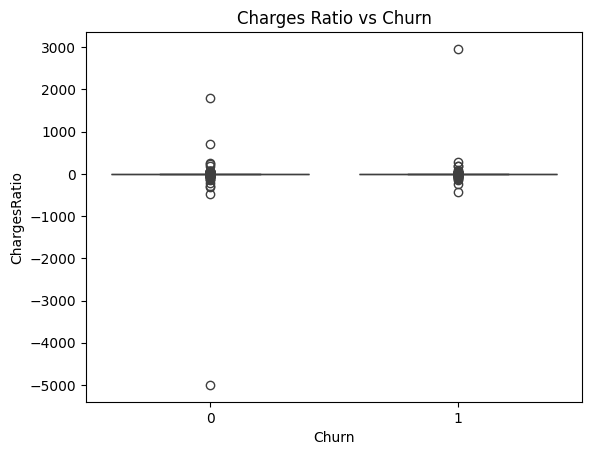

In [ ]:
sns.boxplot(data=df, x='Churn', y='ChargesRatio')
plt.title("Charges Ratio vs Churn")
plt.show()


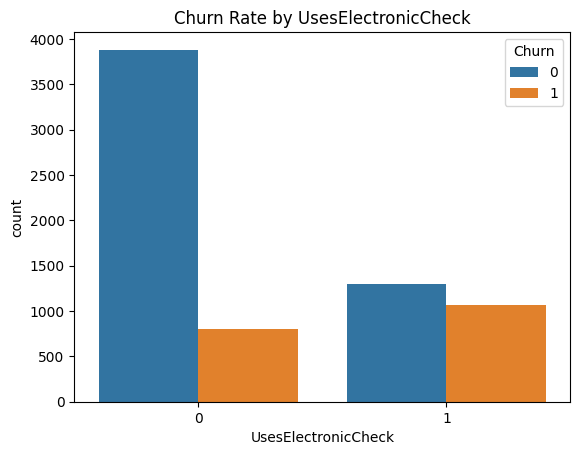

In [ ]:
sns.countplot(data=df, x='UsesElectronicCheck', hue='Churn')
plt.title("Churn Rate by UsesElectronicCheck")
plt.show()


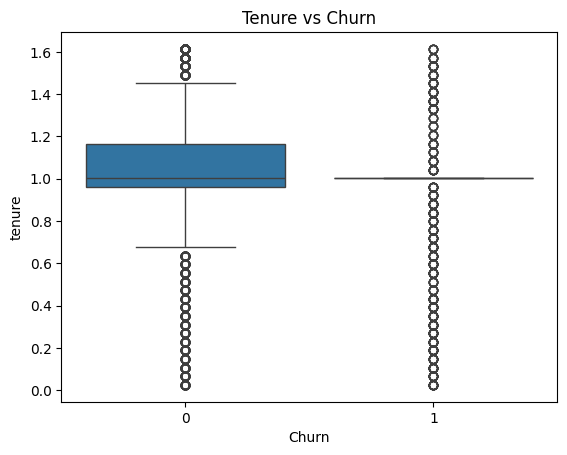

In [ ]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure vs Churn")
plt.show()


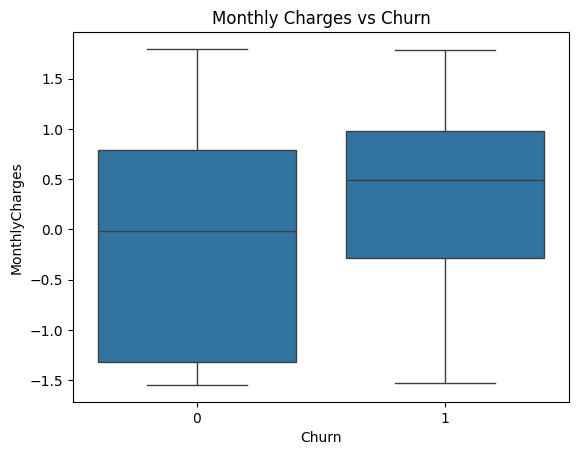

In [ ]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()


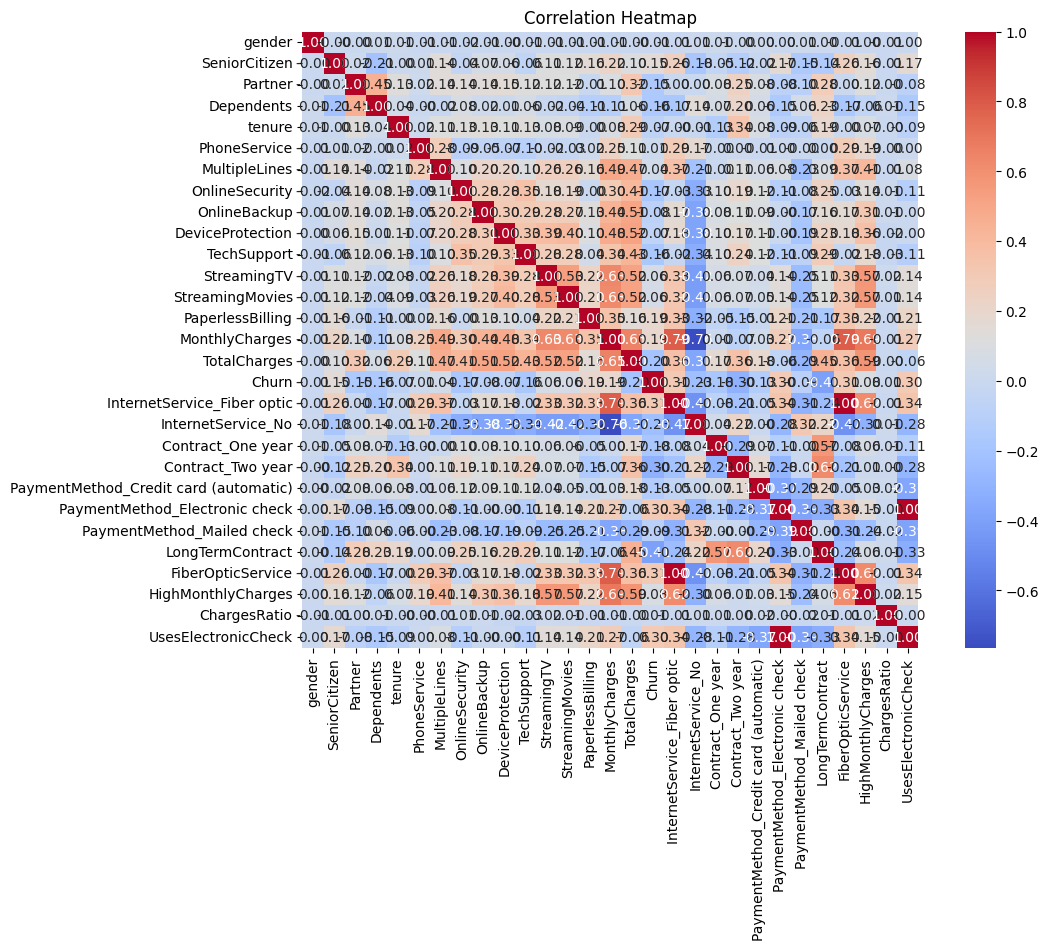

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


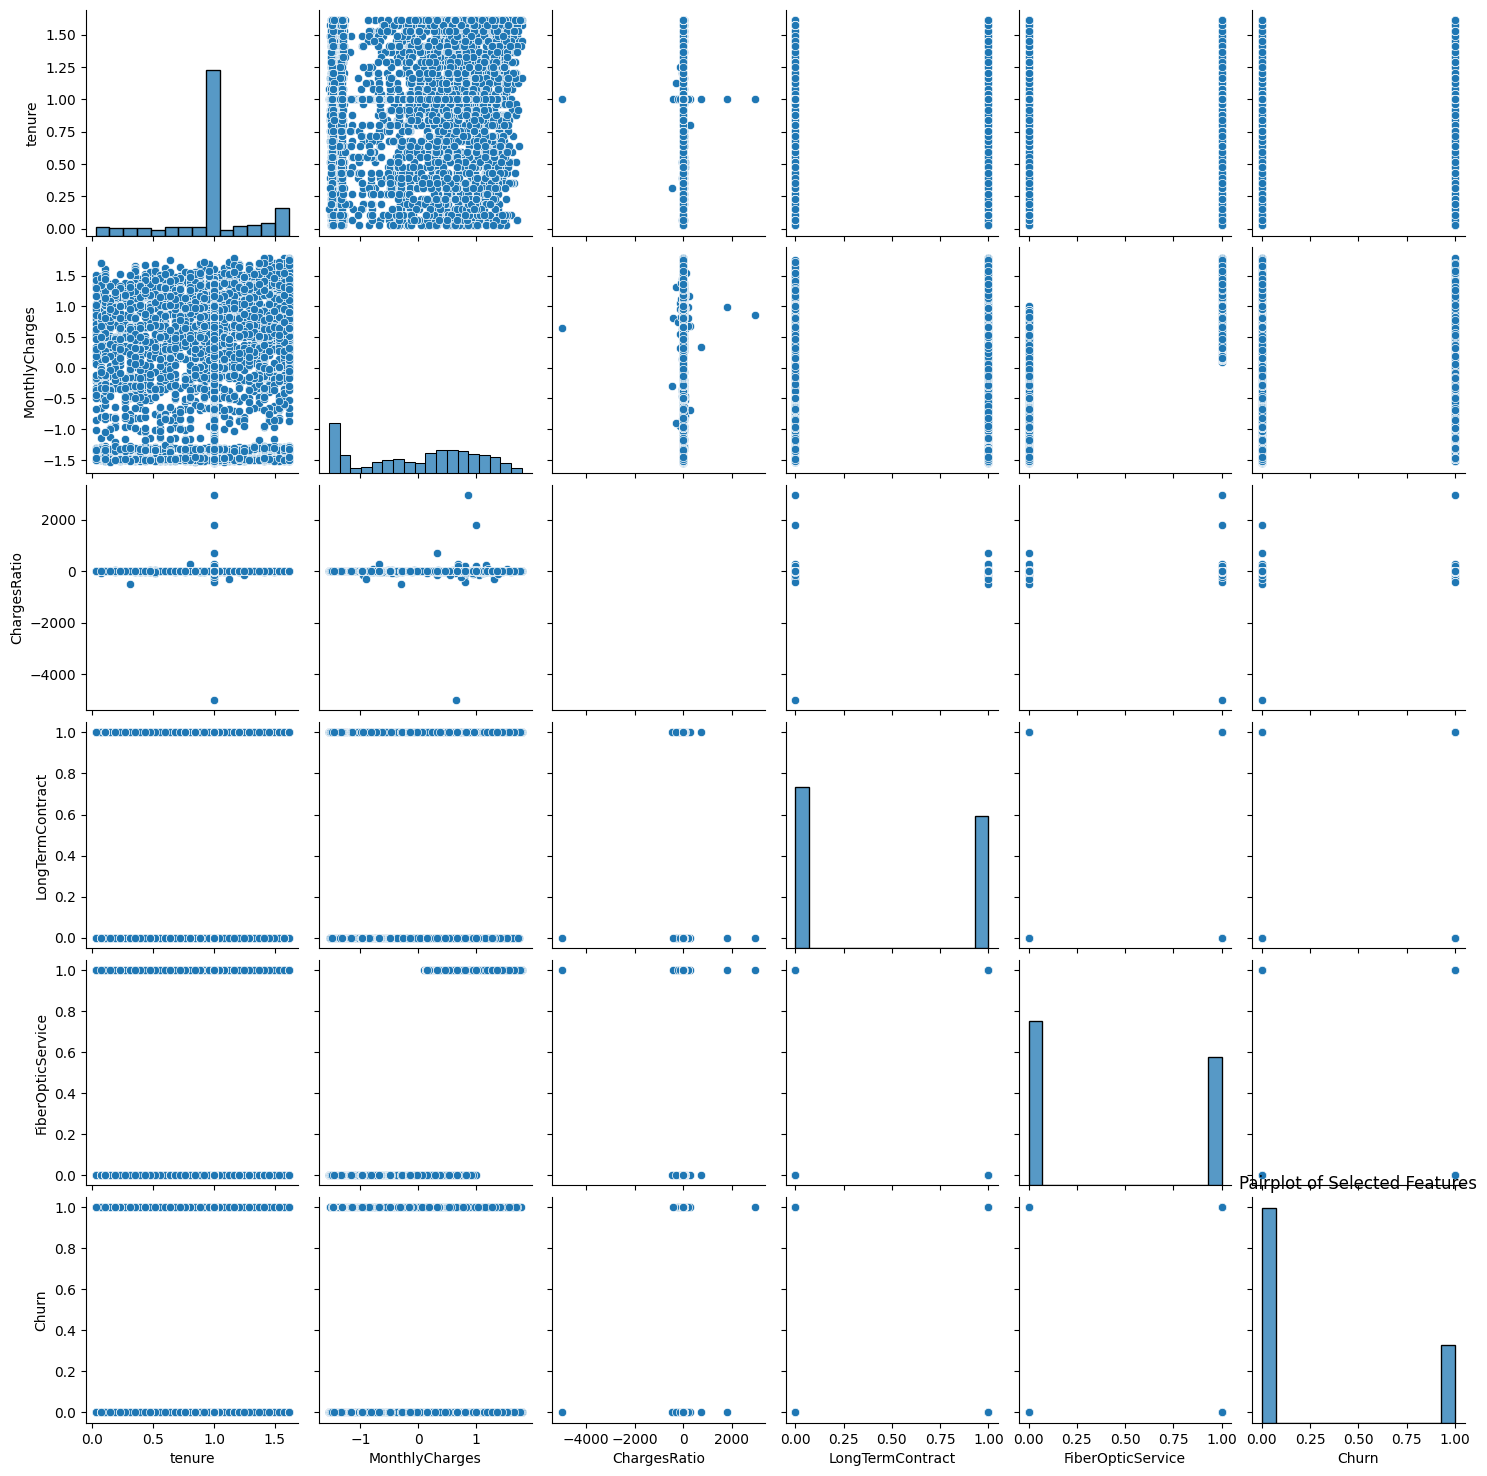

In [ ]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'ChargesRatio', 'LongTermContract', 'FiberOpticService', 'Churn']])
plt.title("Pairplot of Selected Features")
plt.show()
